In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import layers,optimizers
from keras.models import Sequential,load_model
from keras.layers import LSTM, Dense,Dropout,Activation
from node2vec import Node2Vec
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
#from graph2vec import graph2vec
import pickle

In [76]:
import networkx as nx

In [77]:
data = pd.read_csv('data.csv',header=0,usecols=['V1','V2','epochTime'])

In [78]:
print(data.info())
Dict={}#Dictionary to hold graphs based on timestamp
Models = {}#dictionary which contains model based on timestamp. model can be used to get features for each node

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28244 entries, 0 to 28243
Data columns (total 3 columns):
V1           28244 non-null int64
V2           28244 non-null int64
epochTime    28244 non-null int64
dtypes: int64(3)
memory usage: 662.1 KB
None


In [79]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28244 entries, 0 to 28243
Data columns (total 3 columns):
V1           28244 non-null int64
V2           28244 non-null int64
epochTime    28244 non-null int64
dtypes: int64(3)
memory usage: 662.1 KB
None


In [6]:
print(data.head())

   V1  V2  epochTime
0   1   2      21574
1   1   3      21578
2   1   4      21687
3   1   5      21574
4   1   6      21796


In [7]:
print(data.describe())

                 V1            V2      epochTime
count  28244.000000  28244.000000   28244.000000
mean      23.250602     31.936411  127133.897748
std       16.894767     34.492383   75024.084317
min        1.000000      1.000000   20733.000000
25%       10.000000     12.000000   77611.000000
50%       20.000000     23.000000  108205.000000
75%       35.000000     42.000000  180535.750000
max       77.000000    274.000000  364094.000000


In [80]:
G = nx.Graph()

In [9]:
uniqueTimes = data['epochTime'].unique()

In [11]:
print(uniqueTimes)

[ 21574  21578  21687 ... 362458 362800 364094]


In [10]:
print(np.amax(uniqueTimes,axis=0))

364094


In [13]:
print(uniqueTimes.size)

15662


In [81]:
#for column in data[['V1','V2']]:
#constructing graphs at each timestamp
for index, row in data.iterrows():
    if Dict.get(row['epochTime']) is None:
        Dict[row['epochTime']] = nx.Graph()
        Dict[row['epochTime']].add_nodes_from([item for item in range(1, 275)])
        #print(Dict[row['epochTime']].number_of_nodes())
    Dict[row['epochTime']].add_edge(row['V1'],row['V2'])
prevkey = None
print(Dict[364094].number_of_edges())
print(Dict[364094].number_of_nodes())
print(Dict[21574].number_of_edges())
print(Dict[21574].number_of_nodes())
#adding previous timestamp graph's edges to the next graph
for key in sorted(Dict.keys()):
    if prevkey is not None:
        Dict[key].add_edges_from(Dict[prevkey].edges())
    prevkey = key
    #print( 'G_'+str(row['epochTime']))
    #print(row['V1'])
    

1
274
2
274


In [12]:
print(Dict[364094].number_of_edges())
print(Dict[364094].number_of_nodes())
print(Dict[21574].number_of_edges())
print(Dict[21574].number_of_nodes())

2124
274
80
274


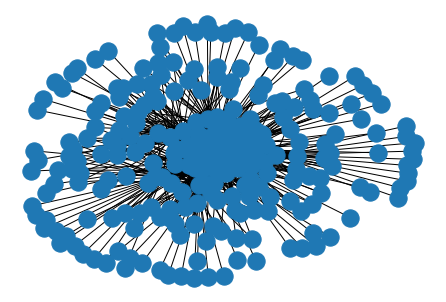

In [13]:
#nx.draw_circular(Dict[364094])
pos = nx.spring_layout(Dict[364094])
nx.draw(Dict[364094],pos=pos)

#nx.draw_spectral(Dict[364094])
plt.show()


In [14]:
print(sorted(Dict.keys()))

[20733, 20821, 20826, 20868, 20943, 20944, 20946, 21055, 21071, 21079, 21110, 21120, 21158, 21165, 21166, 21175, 21193, 21195, 21197, 21242, 21246, 21280, 21287, 21294, 21297, 21301, 21302, 21316, 21354, 21367, 21374, 21395, 21408, 21412, 21413, 21420, 21430, 21445, 21448, 21450, 21452, 21458, 21459, 21462, 21465, 21483, 21493, 21504, 21519, 21526, 21529, 21536, 21540, 21544, 21552, 21558, 21559, 21561, 21564, 21568, 21570, 21572, 21574, 21578, 21579, 21582, 21583, 21592, 21593, 21595, 21599, 21601, 21603, 21613, 21624, 21627, 21638, 21645, 21649, 21656, 21660, 21664, 21666, 21667, 21670, 21673, 21674, 21676, 21678, 21681, 21687, 21688, 21689, 21691, 21694, 21695, 21697, 21701, 21702, 21703, 21705, 21707, 21711, 21712, 21713, 21717, 21720, 21723, 21727, 21734, 21736, 21737, 21748, 21759, 21766, 21780, 21785, 21790, 21791, 21795, 21796, 21806, 21808, 21809, 21810, 21811, 21813, 21814, 21816, 21817, 21818, 21820, 21822, 21825, 21828, 21829, 21830, 21831, 21832, 21834, 21849, 21850, 21851

In [83]:
#print(nx.connected_components(Dict[364094]))
#precompute probabilities, generate walks and embed nodes\
# counter=0
# for key in sorted(Dict.keys()):
#     #print(key)
#     Models[key] = Node2Vec(Dict[key], dimensions=64, walk_length=30, num_walks=64, workers=1).fit(window=10, min_count=1, batch_words=4)
#     #print(Models[key].wv.get_vector('2'))
#     counter=counter+1
#     if counter == 3000:
        #break
#save_Models = open("Models.pickle","wb")
#pickle.dump(Models,save_Models)
#save_Models.close()
saved_Models = open("Models.pickle","rb")
Models = pickle.load(saved_Models)
saved_Models.close()
print(Models[21197].wv.get_vector(str(2)))

[-0.00772432  0.00632752 -0.0063993  -0.00512391  0.00602887 -0.00306697
 -0.0030915  -0.00042292 -0.0058469  -0.00327821  0.00370296 -0.00645732
  0.00681932  0.00542717 -0.00552979  0.00745168 -0.00450834  0.00525491
 -0.00072858  0.00123374  0.00039024  0.00491591  0.00493772 -0.00693729
 -0.00604424  0.00750965  0.00751123 -0.00058198 -0.00375347 -0.0003908
 -0.00310472 -0.00368951 -0.00234433  0.00585498 -0.00098379  0.00055402
 -0.00230983  0.00282037 -0.00536767 -0.00451026 -0.00255146  0.00745383
 -0.00212042  0.00454074 -0.00408302  0.00425594  0.00393322  0.0040973
  0.00757685  0.00145573  0.00357727  0.00070414 -0.00656309 -0.00356132
 -0.00357219 -0.00456994  0.0017245   0.00291742  0.00219621  0.00373749
  0.00666427 -0.00271177  0.00168733  0.00390551]


In [84]:
#nx.clustering(Dict[364094])
Models[21197].wv.get_vector(str(2))
#Models[21197].wv.most_similar('2')

array([-0.00772432,  0.00632752, -0.0063993 , -0.00512391,  0.00602887,
       -0.00306697, -0.0030915 , -0.00042292, -0.0058469 , -0.00327821,
        0.00370296, -0.00645732,  0.00681932,  0.00542717, -0.00552979,
        0.00745168, -0.00450834,  0.00525491, -0.00072858,  0.00123374,
        0.00039024,  0.00491591,  0.00493772, -0.00693729, -0.00604424,
        0.00750965,  0.00751123, -0.00058198, -0.00375347, -0.0003908 ,
       -0.00310472, -0.00368951, -0.00234433,  0.00585498, -0.00098379,
        0.00055402, -0.00230983,  0.00282037, -0.00536767, -0.00451026,
       -0.00255146,  0.00745383, -0.00212042,  0.00454074, -0.00408302,
        0.00425594,  0.00393322,  0.0040973 ,  0.00757685,  0.00145573,
        0.00357727,  0.00070414, -0.00656309, -0.00356132, -0.00357219,
       -0.00456994,  0.0017245 ,  0.00291742,  0.00219621,  0.00373749,
        0.00666427, -0.00271177,  0.00168733,  0.00390551], dtype=float32)

In [ ]:
x = np.zeros((8, 5,128))
y = np.zeros((8, 5,128))
data = train_data
current_idx=0
for i in range(8):
    if current_idx + 5 >= 48:
        # reset the index back to the start of the data set
        current_idx = 0
    x[i, :,:] =data[current_idx:current_idx + 5,:]
    y[i, :,:] =data[current_idx + 1:current_idx + 5 + 1,:]
    # convert all of temp_y into a one hot representation
    #y[i, :, :] = to_categorical(temp_y, num_classes=self.vocabulary)
    current_idx += 5
print(x.shape)

In [85]:
class KerasBatchGenerator(object):

    def __init__(self, data, num_steps, batch_size, skip_step=2):
        self.data = data
        self.num_steps = num_steps
        self.batch_size = batch_size
        self.feature_size = 128
        # this will track the progress of the batches sequentially through the
        # data set - once the data reaches the end of the data set it will reset
        # back to zero
        self.current_idx = 0
        # skip_step is the number of words which will be skipped before the next
        # batch is skimmed from the data set
        self.skip_step = skip_step

    def generate(self):
        x = np.zeros((self.batch_size, self.num_steps,self.feature_size))
        y = np.zeros((self.batch_size, self.num_steps, self.feature_size))
        while True:
            for i in range(self.batch_size):
                if self.current_idx + self.num_steps >= len(self.data):
                    # reset the index back to the start of the data set
                    self.current_idx = 0
                x[i, :,:] = self.data[self.current_idx:self.current_idx + self.num_steps,:]
                y[i, :,:] = self.data[self.current_idx + 1:self.current_idx + self.num_steps + 1,:]
                # convert all of temp_y into a one hot representation
                #y[i, :, :] = to_categorical(temp_y, num_classes=self.vocabulary)
                self.current_idx += self.skip_step
            #print(x)
            yield x, y

In [ ]:
adj = nx.adjacency_matrix(Dict[21687])
print(adj)


In [20]:

train_list = []
node_features_list=[]
for keys in sorted(Models.keys()):
        node_features_list=[]
        for nodes in range(1,3):
            node_features_list.append(list(Models[keys].wv.get_vector(str(nodes))))
        train_list.append(node_features_list)
train_data =  np.array(train_list)   
#train_data = np.array(node_features_list)
print(train_data.shape)
train_data = np.reshape(train_data,(100,128))
print(train_data.shape)


(3000, 2, 64)


ValueError: cannot reshape array of size 384000 into shape (100,128)

In [ ]:
print(train_data.shape)
print(len(Models.keys()))
#

#print(x.shape)

In [86]:
def load_data():
    # build the complete vocabulary, then convert text data to list of integers
    #word_to_id = build_vocab(train_path)
    train_list = []
    for keys in sorted(Models.keys()):
        node_features_list=[]
        for nodes in range(1,3):
            node_features_list.append(list(Models[keys].wv.get_vector(str(nodes))))
        train_list.append(node_features_list)
    A = np.array(train_list)
    #print(A.shape)
    #print(A[1:2,:])
    A1 = np.reshape(A,(3000,128))
    #print(train_data.shape)
    train_data = A1[0:2000,:]
    valid_data = A1[2000:3000,:]
    test_data = A1[2000:3000,:]
    test_data1 = A1[2001:3000,:]
    #vocabulary = len(word_to_id)
    #reversed_dictionary = dict(zip(word_to_id.values(), word_to_id.keys()))

    #print(train_data[:5])
    #print(word_to_id)
    #print(vocabulary)
    #print(" ".join([reversed_dictionary[x] for x in train_data[:10]]))
    return train_data, valid_data, test_data,test_data1,A1

In [97]:
train_data, valid_data, test_data,test_data1,A1 = load_data()
num_steps=5
batch_size=128
valid_batchsize = 1
test_batchsize = 1

train_data_generator = KerasBatchGenerator(train_data, num_steps, batch_size,
                                           skip_step=2)
valid_data_generator = KerasBatchGenerator(valid_data, num_steps, batch_size,
                                           skip_step=2)
test_data_generator = KerasBatchGenerator(test_data, num_steps, batch_size,
                                           skip_step=2)
print(train_data.shape
     )
print(len(train_data))
print(len(valid_data)//(batch_size*num_steps))
print(len(test_data))


(2000, 128)
2000
1
1000


In [98]:
hidden_size=128
num_epochs = 200
model = Sequential()
model.add(LSTM(hidden_size, return_sequences=True,input_shape=(num_steps,128 )))

model.add(LSTM(hidden_size, return_sequences=True))
model.add(layers.Dense(128,kernel_initializer='uniform',activation='tanh',use_bias=False))
model.add(layers.BatchNormalization())

model.add(Activation('tanh'))
#model.add(LSTM(128))
#if use_dropout:
#model.add(Dropout(0.5))
# model.compile(loss='mean_squared_error',
#              optimizer='adam',
#              metrics=['accuracy'])


#
#model.add(Activation('tanh'))
#model.add(Dropout(0.2))
#model.add(layers.Dense(128,kernel_initializer='uniform',activation = 'tanh'))
#model.add(layers.BatchNormalization())
#sgd = optimizers.SGD(lr=0.0001, decay=.00005, momentum=0.9, nesterov=True)
adam = optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999,epsilon=10e-08,amsgrad=True)
#optimizer = Adam()
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)
print(model.summary())
model.fit_generator(train_data_generator.generate(), (len(train_data)//(batch_size*num_steps)), num_epochs,validation_data=valid_data_generator.generate(),
                        validation_steps=(len(valid_data)//(batch_size*num_steps)),callbacks=[checkpointer]
                        )


Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_47 (LSTM)               (None, 5, 128)            131584    
_________________________________________________________________
lstm_48 (LSTM)               (None, 5, 128)            131584    
_________________________________________________________________
dense_23 (Dense)             (None, 5, 128)            16384     
_________________________________________________________________
batch_normalization_23 (Batc (None, 5, 128)            512       
_________________________________________________________________
activation_23 (Activation)   (None, 5, 128)            0         
Total params: 280,064
Trainable params: 279,808
Non-trainable params: 256
_________________________________________________________________
None
Epoch 1/200
3/3 [==============================] - ETA: 15s - loss: 0.3457 - accuracy: 0.031 - ETA: 4s - l

3/3 [==============================] - ETA: 0s - loss: 0.1706 - accuracy: 0.08 - ETA: 0s - loss: 0.1573 - accuracy: 0.09 - 1s 276ms/step - loss: 0.1421 - accuracy: 0.0844 - val_loss: 0.0745 - val_accuracy: 0.0063

Epoch 00025: val_loss improved from 0.07634 to 0.07448, saving model to weights.hdf5
Epoch 26/200
3/3 [==============================] - ETA: 0s - loss: 0.1006 - accuracy: 0.04 - ETA: 0s - loss: 0.1520 - accuracy: 0.05 - 1s 274ms/step - loss: 0.1649 - accuracy: 0.0724 - val_loss: 0.0916 - val_accuracy: 0.2281

Epoch 00026: val_loss did not improve from 0.07448
Epoch 27/200
3/3 [==============================] - ETA: 0s - loss: 0.1819 - accuracy: 0.14 - ETA: 0s - loss: 0.1775 - accuracy: 0.13 - 1s 255ms/step - loss: 0.1718 - accuracy: 0.1292 - val_loss: 0.0750 - val_accuracy: 0.0203

Epoch 00027: val_loss did not improve from 0.07448
Epoch 28/200
3/3 [==============================] - ETA: 0s - loss: 0.1312 - accuracy: 0.08 - ETA: 0s - loss: 0.1177 - accuracy: 0.07 - 1s 260ms/

3/3 [==============================] - ETA: 0s - loss: 0.1233 - accuracy: 0.19 - ETA: 0s - loss: 0.1199 - accuracy: 0.20 - 1s 345ms/step - loss: 0.1156 - accuracy: 0.2208 - val_loss: 0.0552 - val_accuracy: 0.2391

Epoch 00053: val_loss did not improve from 0.05081
Epoch 54/200
3/3 [==============================] - ETA: 0s - loss: 0.0892 - accuracy: 0.10 - ETA: 0s - loss: 0.0815 - accuracy: 0.13 - 1s 333ms/step - loss: 0.0783 - accuracy: 0.1349 - val_loss: 0.0549 - val_accuracy: 0.2937

Epoch 00054: val_loss did not improve from 0.05081
Epoch 55/200
3/3 [==============================] - ETA: 0s - loss: 0.1325 - accuracy: 0.18 - ETA: 0s - loss: 0.1286 - accuracy: 0.23 - 1s 233ms/step - loss: 0.1253 - accuracy: 0.2307 - val_loss: 0.0527 - val_accuracy: 0.3859

Epoch 00055: val_loss did not improve from 0.05081
Epoch 56/200
3/3 [==============================] - ETA: 0s - loss: 0.1099 - accuracy: 0.22 - ETA: 0s - loss: 0.1039 - accuracy: 0.21 - 1s 281ms/step - loss: 0.0950 - accuracy: 0.


Epoch 00081: val_loss did not improve from 0.04449
Epoch 82/200
3/3 [==============================] - ETA: 0s - loss: 0.0788 - accuracy: 0.35 - ETA: 0s - loss: 0.0737 - accuracy: 0.27 - 1s 272ms/step - loss: 0.0697 - accuracy: 0.2521 - val_loss: 0.0483 - val_accuracy: 0.5078

Epoch 00082: val_loss did not improve from 0.04449
Epoch 83/200
3/3 [==============================] - ETA: 0s - loss: 0.0578 - accuracy: 0.17 - ETA: 0s - loss: 0.0595 - accuracy: 0.17 - 1s 317ms/step - loss: 0.0704 - accuracy: 0.2156 - val_loss: 0.0439 - val_accuracy: 0.3109

Epoch 00083: val_loss improved from 0.04449 to 0.04390, saving model to weights.hdf5
Epoch 84/200
3/3 [==============================] - ETA: 0s - loss: 0.0860 - accuracy: 0.37 - ETA: 0s - loss: 0.0844 - accuracy: 0.32 - 1s 226ms/step - loss: 0.0814 - accuracy: 0.3443 - val_loss: 0.0499 - val_accuracy: 0.3406

Epoch 00084: val_loss did not improve from 0.04390
Epoch 85/200
3/3 [==============================] - ETA: 0s - loss: 0.0626 - acc


Epoch 00110: val_loss improved from 0.04258 to 0.04173, saving model to weights.hdf5
Epoch 111/200
3/3 [==============================] - ETA: 0s - loss: 0.0474 - accuracy: 0.10 - ETA: 0s - loss: 0.0483 - accuracy: 0.18 - 1s 243ms/step - loss: 0.0494 - accuracy: 0.2005 - val_loss: 0.0427 - val_accuracy: 0.2828

Epoch 00111: val_loss did not improve from 0.04173
Epoch 112/200
3/3 [==============================] - ETA: 0s - loss: 0.0649 - accuracy: 0.29 - ETA: 0s - loss: 0.0679 - accuracy: 0.29 - 1s 243ms/step - loss: 0.0662 - accuracy: 0.2875 - val_loss: 0.0435 - val_accuracy: 0.4688

Epoch 00112: val_loss did not improve from 0.04173
Epoch 113/200
3/3 [==============================] - ETA: 0s - loss: 0.0613 - accuracy: 0.32 - ETA: 0s - loss: 0.0586 - accuracy: 0.35 - 1s 244ms/step - loss: 0.0545 - accuracy: 0.2828 - val_loss: 0.0475 - val_accuracy: 0.5641

Epoch 00113: val_loss did not improve from 0.04173
Epoch 114/200
3/3 [==============================] - ETA: 0s - loss: 0.0494 -


Epoch 00139: val_loss did not improve from 0.03726
Epoch 140/200
3/3 [==============================] - ETA: 0s - loss: 0.0453 - accuracy: 0.31 - ETA: 0s - loss: 0.0500 - accuracy: 0.25 - 1s 253ms/step - loss: 0.0565 - accuracy: 0.2891 - val_loss: 0.0471 - val_accuracy: 0.6125

Epoch 00140: val_loss did not improve from 0.03726
Epoch 141/200
3/3 [==============================] - ETA: 0s - loss: 0.0568 - accuracy: 0.34 - ETA: 0s - loss: 0.0537 - accuracy: 0.32 - 1s 264ms/step - loss: 0.0517 - accuracy: 0.3380 - val_loss: 0.0432 - val_accuracy: 0.3391

Epoch 00141: val_loss did not improve from 0.03726
Epoch 142/200
3/3 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.38 - ETA: 0s - loss: 0.0417 - accuracy: 0.28 - 1s 248ms/step - loss: 0.0433 - accuracy: 0.2901 - val_loss: 0.0405 - val_accuracy: 0.2922

Epoch 00142: val_loss did not improve from 0.03726
Epoch 143/200
3/3 [==============================] - ETA: 0s - loss: 0.0383 - accuracy: 0.16 - ETA: 0s - loss: 


Epoch 00168: val_loss did not improve from 0.03280
Epoch 169/200
3/3 [==============================] - ETA: 0s - loss: 0.0363 - accuracy: 0.20 - ETA: 0s - loss: 0.0454 - accuracy: 0.26 - 1s 265ms/step - loss: 0.0458 - accuracy: 0.3182 - val_loss: 0.0411 - val_accuracy: 0.2609

Epoch 00169: val_loss did not improve from 0.03280
Epoch 170/200
3/3 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.32 - ETA: 0s - loss: 0.0405 - accuracy: 0.38 - 1s 324ms/step - loss: 0.0382 - accuracy: 0.3771 - val_loss: 0.0318 - val_accuracy: 0.3938

Epoch 00170: val_loss improved from 0.03280 to 0.03183, saving model to weights.hdf5
Epoch 171/200
3/3 [==============================] - ETA: 0s - loss: 0.0391 - accuracy: 0.26 - ETA: 0s - loss: 0.0429 - accuracy: 0.28 - 1s 231ms/step - loss: 0.0409 - accuracy: 0.2109 - val_loss: 0.0470 - val_accuracy: 0.6078

Epoch 00171: val_loss did not improve from 0.03183
Epoch 172/200
3/3 [==============================] - ETA: 0s - loss: 0.0510 -

3/3 [==============================] - ETA: 0s - loss: 0.0456 - accuracy: 0.29 - ETA: 0s - loss: 0.0424 - accuracy: 0.38 - 1s 243ms/step - loss: 0.0404 - accuracy: 0.3891 - val_loss: 0.0511 - val_accuracy: 0.0375

Epoch 00198: val_loss did not improve from 0.03183
Epoch 199/200
3/3 [==============================] - ETA: 0s - loss: 0.0331 - accuracy: 0.49 - ETA: 0s - loss: 0.0313 - accuracy: 0.35 - 1s 253ms/step - loss: 0.0337 - accuracy: 0.3339 - val_loss: 0.0498 - val_accuracy: 0.0469

Epoch 00199: val_loss did not improve from 0.03183
Epoch 200/200
3/3 [==============================] - ETA: 0s - loss: 0.0492 - accuracy: 0.26 - ETA: 0s - loss: 0.0473 - accuracy: 0.26 - 1s 291ms/step - loss: 0.0464 - accuracy: 0.2854 - val_loss: 0.0455 - val_accuracy: 0.0688

Epoch 00200: val_loss did not improve from 0.03183


In [96]:
#model.predict(test_data_generator.generate(),steps = len(test_data)//batch_size*num_steps,verbose=1)
model = load_model('weights.hdf5')
model.evaluate_generator(test_data_generator.generate(),steps = (len(test_data)//(batch_size*num_steps)),verbose=1)

3/3 [==============================] - ETA:  - ETA:  - 3s 959ms/step


[0.05248323827981949, 0.12083332985639572]

In [ ]:
save_features = open("features.pickle","wb")
pickle.dump(A1,save_features)
save_features.close()

In [ ]:
saved_features = open("features.pickle","rb")
A2 = pickle.load(saved_features)
saved_features.close()

In [ ]:
print(A2.shape)

In [ ]:
#save_Models = open("Models.pickle","wb")
#pickle.dump(Models,save_Models)
#save_Models.close()
saved_Models = open("Models.pickle","rb")
Models2 = pickle.load(saved_Models)
saved_Models.close()
print(Models2[21197].wv.get_vector(str(2)))

In [ ]:
#model.predict(test_data,test_data1)

In [ ]:
#model.add(LSTM(256,input_Shape=(1,1)))
dummy_iters = 10
example_training_generator = KerasBatchGenerator(train_data, num_steps, 1,
                                                     skip_step=1)
for i in range(dummy_iters):
    dummy = next(example_training_generator.generate())
num_predict = 10
#print(dummy[:,1,:])
prediction = None
actual = None
for i in range(num_predict):
    data = next(example_training_generator.generate())
    prediction = model.predict(data[0])
    actual = train_data[num_steps + dummy_iters + i,:]
    #predict_word = np.argmax(prediction[:, num_steps-1, :])
    print(prediction.shape)
print(prediction[:,1,:])
print(actual)
    #true_print_out += reversed_dictionary[train_data[num_steps + dummy_iters + i]] + " "
    #pred_print_out += reversed_dictionary[predict_word] + " "